In [1]:
%matplotlib inline

# Array Data

Raw data from an experiment are usually stored in arrays. For example, a 2D array could be used to record oscilloscope traces with repeat measurements stored in rows. This notebook reviews extracting array data from hdf5 files.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from e11 import H5Data

In [3]:
import os 
fil = os.path.join(os.getcwd(), 'example_data', 'array_data.h5')
# read hdf5 file
h5 = H5Data(fil)
h5.pprint()

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 352.70it/s]


file: 		 C:\Users\Adam\Documents\Git\e11_analysis\notebooks\example_data\array_data.h5 
size: 		 19.80 MB 
groups: 	 6 
author: 	 AD 
description: 	 Testing oskar data acquisition.


In [4]:
# List the datasets that belong to the group `squid=1`.
print(h5.datasets(1))

('AV_0', 'IMG', 'OSC_0')


## Oscilloscope data

Oscilloscope traces are typically stored as 2d arrays of repeating 1d measurements.

In [5]:
# Load 2D array data from the hdf5 file,
squid = 1
dat, osc_info = h5.array(squid, dataset='OSC_0', ignore_missing=False, info=True)
# This data contains traces of 2501 data points and 25 repeats are stored along the first dimension.
print(np.shape(dat))

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.86it/s]


(25, 2502)


In [6]:
# information about the dataset
osc_info

,Averages,Manufacturer,Model,Serial Number,dt
squid,,,,,
1,10,LECROY,HDO4054,LCRY3513N19955,8.000000e-10


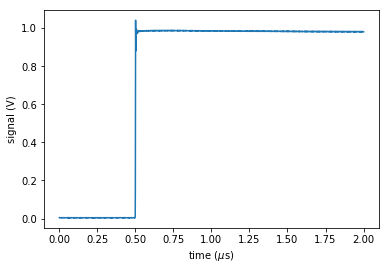

In [7]:
# plot
fig, ax = plt.subplots()

# data
dt = 1e6 * osc_info['dt']
xvals = np.arange(0, len(dat[0])*dt, dt)
yvals = np.mean(dat, axis=0)
ax.plot(xvals, yvals)

# format
ax.set_xlabel('time ($\mu$s)')
ax.set_ylabel('signal (V)')

# output
#outfil = h5.sub_dire('plots', fname='signal.png')
#plt.savefig(outfil, bbox_inches='tight', dpi=200)
plt.show()

## Camera data

Camera data are typically stored as 3d arrays of repeating 2d exposures.  Here, the repeats are stored along axis=2, in accordance with the convention of `HDFView`.

In [8]:
# read image datasets
squids = [1, 2]
img, camera_info = h5.array(squids, dataset='IMG', axis=2, ignore_missing=True, info=True)
# Repeats of the 128 x 128 images. Concatenation is performed using `axis=2`.
print(np.shape(img))

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 399.63it/s]


(128, 128, 19)


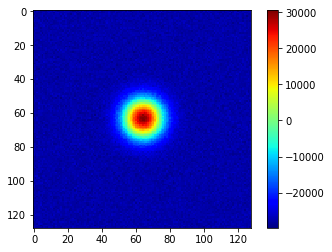

In [9]:
# average image
av_img = np.mean(img, axis=2)
cmap = 'jet'
# plot
fig, ax = plt.subplots()
image = ax.imshow(av_img, cmap=cmap)
cb = plt.colorbar(image)

# output
#outfil = h5.sub_dire('images', fname='fake.png')
#plt.savefig(outfil, bbox_inches='tight', dpi=200)
plt.show()

In [10]:
camera_info

,Exposure (ms),Manufacturer,Model
squid,,,
1,1000,Sirius Cybernetics Corporation,image-o-matic
